### Import libraries

In [ ]:
import string
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Read opinions from CSV file

In [ ]:
opinions = pd.read_csv("./consolidated_opinions.csv", encoding="UTF-8")

In [ ]:
opinions = opinions[['opinion', 'score', 'sentiment']]

In [ ]:
opinions.sentiment = opinions.sentiment.str.lower()

### Obtain sentiment using Vader

In [ ]:
sa = SentimentIntensityAnalyzer()
opinions['vader'] = opinions.opinion.apply(lambda o: sa.polarity_scores(str(o)))

In [ ]:
sentiment = pd.concat([opinions, opinions['vader'].apply(pd.Series)], axis=1).drop(columns=['vader'])

In [ ]:
sentiment['vader_sentiment'] = sentiment.apply(
    lambda row: 'positive' if row['compound'] >= 0.05 else ('negative' if row['compound'] <= -0.05 else 'neutral'), axis=1)

In [ ]:
misclassified = confusion_matrix(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'])

In [ ]:
ConfusionMatrixDisplay(misclassified, display_labels=['positive', 'neutral', 'negative']).plot()

In [ ]:
raport = classification_report(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'], output_dict=True)

In [ ]:
raport_df = pd.DataFrame(raport).transpose()

### Save results

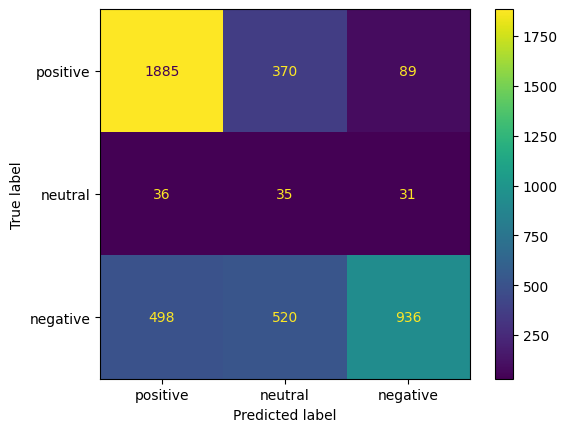

In [26]:
sentiment.to_csv("./sentiment_analysis_vader.csv", index=False, encoding="UTF-8")
raport_df.to_csv("./classification_report_vader.csv", index=True, encoding="UTF-8")
misclassified_df = pd.DataFrame(misclassified, index=['actual_positive', 'actual_neutral', 'actual_negative'], columns=['predicted_positive', 'predicted_neutral', 'predicted_negative']).to_csv("./confusion_matrix_vader.csv", index=True, encoding="UTF-8")  
ConfusionMatrixDisplay(misclassified, display_labels=['positive', 'neutral', 'negative']).plot().figure_.savefig("./confusion_matrix_vader.png")